# Modelo Random Forest

Implementado por Jesús David Barrios (j.barrios) - 201921887

### Importar librerías y cargar datos

In [44]:
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
# Import SGD Classifier
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

# Optimización modelo
from sklearn.model_selection import GridSearchCV

# Guardar modelo
import joblib, pickle


In [45]:
# Importar datos
db_route = '../data/processed_data_min.csv'
df = pd.read_csv(db_route)

# Imprimir número de filas
print('Número de filas: ', df.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df.shape[1])
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar

df.sample(5)

Número de filas:  5000
Número de columnas:  2


,class,tokens
3627,1,moth abus meh moth alway rud mock degrad day a...
3737,1,quest would work sav enough money hir afterma ...
4386,1,parentsth thing real keep al right awhil par r...
2953,1,depress selfim year old guy virgin typ sub mal...
645,0,pleas say someth pee pooooooooooooooooooooo pl...


In [46]:
# Contar valores nulos
df.isnull().sum()

class     0
tokens    5
dtype: int64

In [47]:
# Eliminar valores nulos
df.dropna(inplace=True)

### Separación de datos

In [48]:
# División entre variables independientes y dependientes
X = df['tokens']
Y = df['class']

In [49]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=1200, min_df=2, max_features=10000, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)
print(X_count.shape)

(4995, 10000)


In [50]:
# Separación de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_count, Y, test_size=0.2, random_state=42)

### Modelo

In [51]:
# Parametros para GridSearchCV
parameters = {
    'n_estimators': [100, 120],
    'criterion' : ["gini", "entropy"]
}

In [52]:
# Crear modelo
model = RandomForestClassifier(random_state=42)

# Crear modelo con GridSearchCV
b_model = GridSearchCV(model, parameters, cv=4, n_jobs=-1, verbose=1)
b_model

# Entrenar modelo
b_model.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120]},
             verbose=1)

### Evaluación

In [53]:
# Predicción
Y_pred = b_model.predict(X_test)

# Evaluación del modelo
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1: ', f1_score(Y_test, Y_pred, average='weighted'))
print('Precision: ', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall: ', recall_score(Y_test, Y_pred, average='weighted'))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.8538538538538538
F1:  0.8538362807483507
Precision:  0.8548051200143142
Recall:  0.8538538538538538
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       509
           1       0.83      0.88      0.85       490

    accuracy                           0.85       999
   macro avg       0.85      0.85      0.85       999
weighted avg       0.85      0.85      0.85       999



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


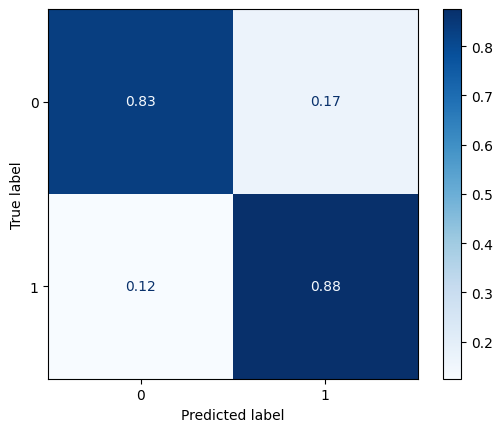

In [54]:
# Matriz de confusión
plot_confusion_matrix(b_model, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')